In [1]:
# Imports of the packages needed for the implementation 
import mne as mne
from mne.preprocessing import ICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from pylab import *
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Reading the training data from the folders 
S001 = "final-concatenation/S001/Training data/S001-final-concat.csv"
S002 = "final-concatenation/S002/Training data/S002-final-concat.csv"
#S003 = "final-concatenation/S003/Training data/S003-final-concat.csv"
#S004 = "final-concatenation/S004/Training data/S004-final-concat.csv"
#S005 = "final-concatenation/S005/Training data/S005-final-concat.csv"
#S006 = "final-concatenation/S006/Training data/S006-final-concat.csv"
#S007 = "final-concatenation/S007/Training data/S007-final-concat.csv"
#S008 = "final-concatenation/S008/Training data/S008-final-concat.csv"
#S009 = "final-concatenation/S009/Training data/S009-final-concat.csv"
#S010 = "final-concatenation/S010/Training data/S010-final-concat.csv"

#S004, S005, S006, S007, S008, S009, S010

# Form a list of files for the subjects training data
file_list = [S001, S002]

In [12]:
#This definition reads a csv file by opening it and reading using a csv reader from panda
# It drops the channels that are not going to be used for implementation, we want to focus on the channel 
# that helps with person identification. It then transposes the data so it creates an array list of the 
# each of the subjects data, we then identified the channel name that will be used and create information
# of the eeg data. we then create a raw array using an mne tool which is used for the analyses of EEG data
# It then filters the dataset and creates epochs and time points which will be fed into the classiifcation method 
# or will be used to extract features and returns the array of the epochs.abs

def read_data(file):
    Open_file = open(file)
    Read_file = pd.read_csv(Open_file)
    Read_file.drop(['# AF3', 'F3','FC5', 'T7','P7', 'O1','P8', 'T8', 'FC6', 'F4', 'F7','F8', 'AF4'], axis=1, inplace=True)
    file_transpose = Read_file.transpose()
    ch_names = ['O2']

    info = mne.create_info(ch_names = ch_names, ch_types=['eeg'] * len(ch_names), sfreq=250)
    info.set_montage('standard_1020')
    raw = mne.io.RawArray(file_transpose, info)
    raw.pick_channels(['O2'])
    raw.crop(0,250)


    fig, ax = plt.subplots(figsize=[15, 5])
    start_time = 0
    end_time = 5

    ax.plot(raw.get_data(picks='O2', tmin=start_time, tmax=end_time).T)
    plt.title("Raw Data for Channel O2")
    plt.xlabel('Times(seconds)')
    plt.ylabel('Voltage')
    plt.show()

    raw_filt = raw.copy().filter(l_freq=0.5, h_freq=59, picks='eeg')
    raw.plot_psd()
    raw_filt.plot_psd()

    fig, ax = plt.subplots(figsize=[15, 5])
    start_time = 0
    end_time = 5

    ax.plot(raw_filt.get_data(picks='O2', tmin=start_time, tmax=end_time).T)
    plt.title("Filtered data for Channel O2")
    plt.xlabel('Times(seconds)')
    plt.ylabel('Voltage')
    plt.show()

    epochs = mne.make_fixed_length_epochs(raw_filt, duration=5,preload=True).pick_types(eeg=True)

    array  = epochs.get_data()
    event_dict = {'O2': 1}
    epochs.plot()
    return  array

Creating RawArray with float64 data, n_channels=1, n_times=138240
    Range : 0 ... 138239 =      0.000 ...   552.956 secs
Ready.


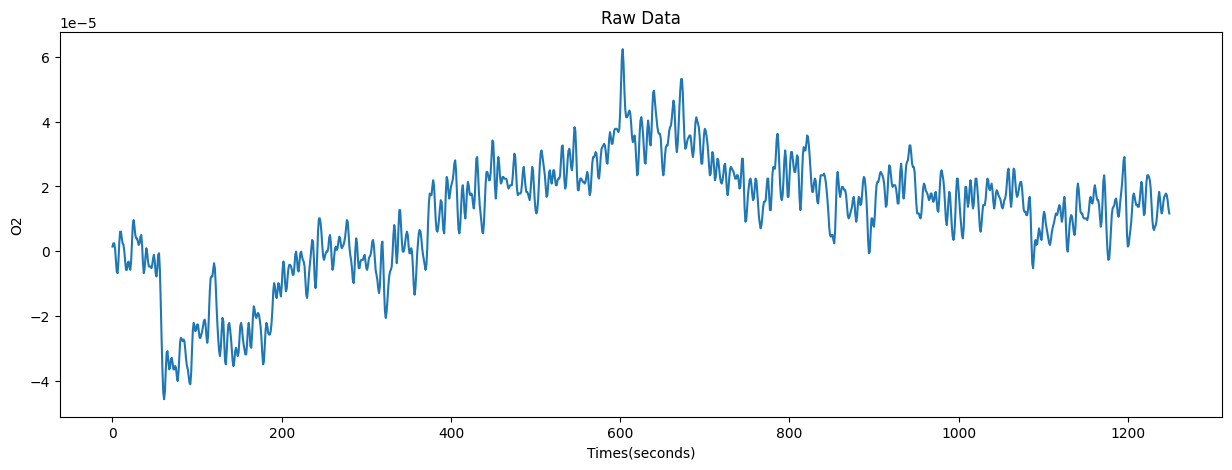

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 59 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 59.00 Hz
- Upper transition bandwidth: 14.75 Hz (-6 dB cutoff frequency: 66.38 Hz)
- Filter length: 1651 samples (6.604 sec)

Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Paralle

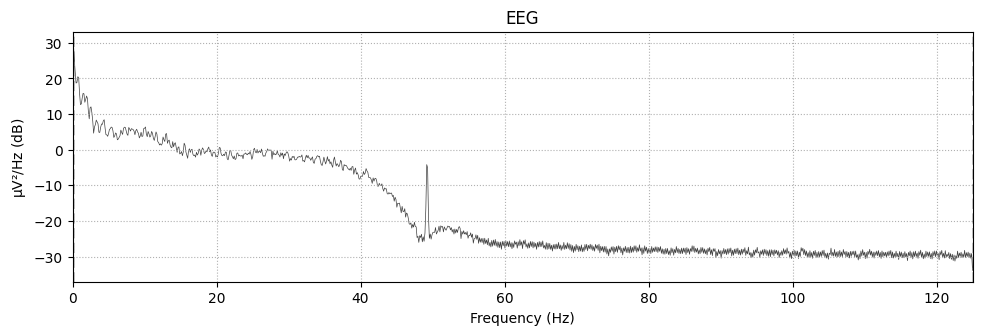

Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


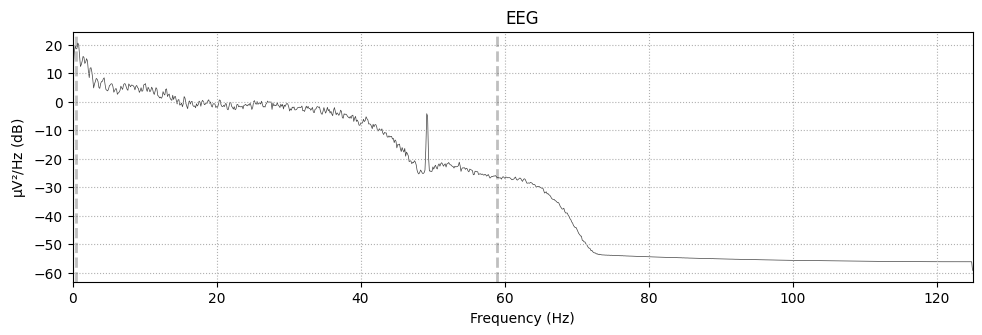

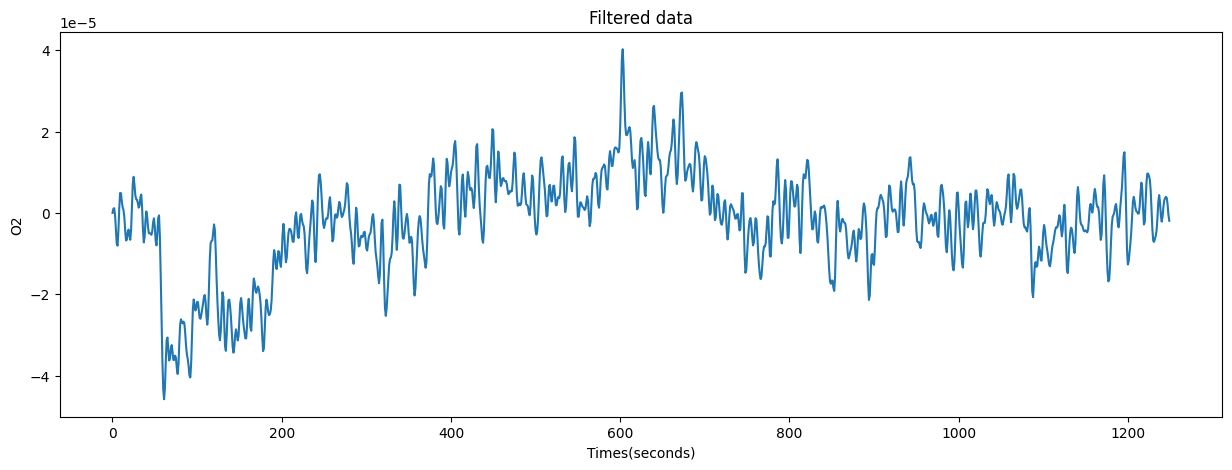

Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 50 events and 1250 original time points ...
0 bad epochs dropped


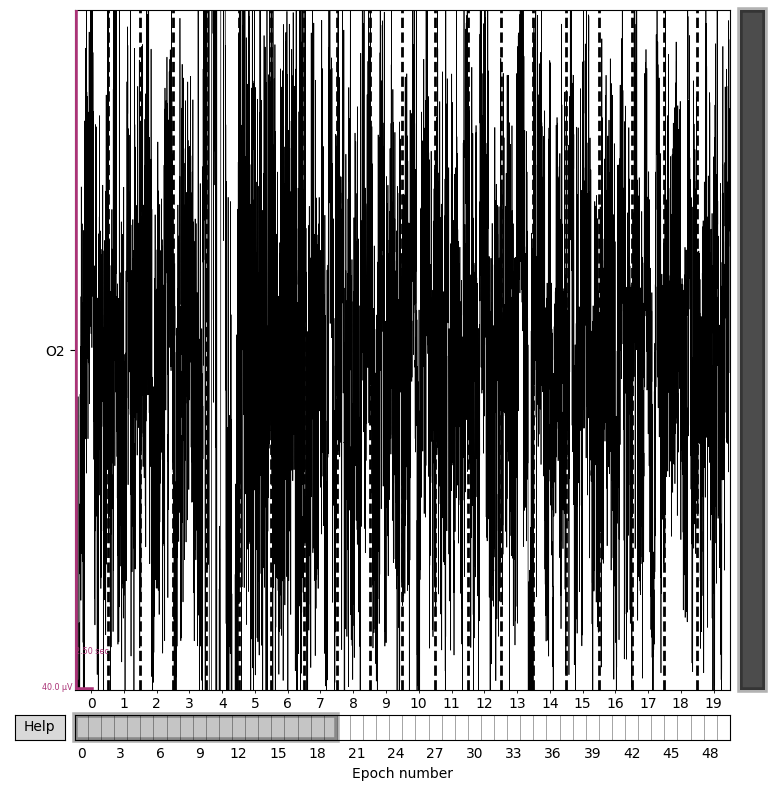

Creating RawArray with float64 data, n_channels=1, n_times=138240
    Range : 0 ... 138239 =      0.000 ...   552.956 secs
Ready.


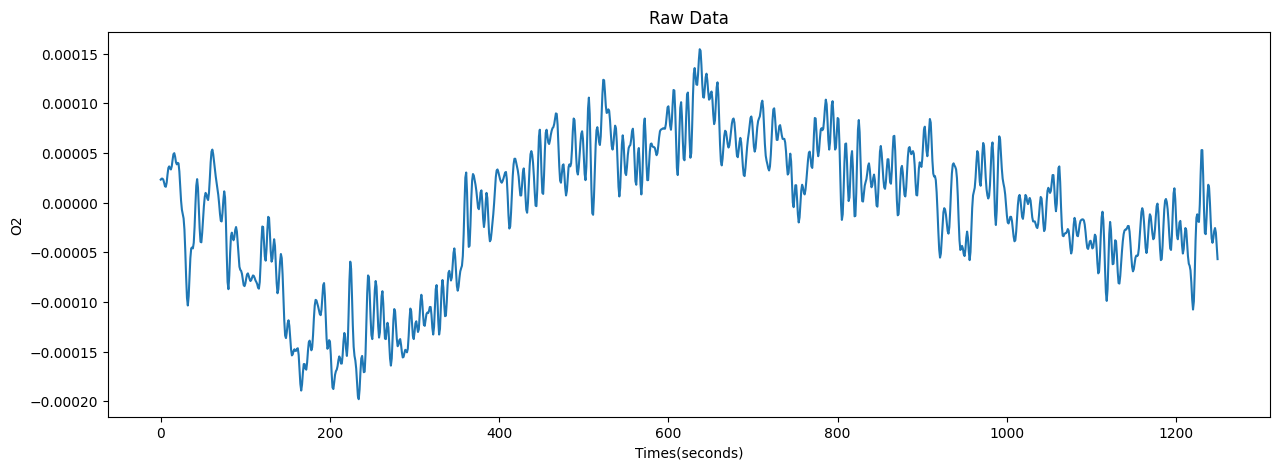

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 59 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 59.00 Hz
- Upper transition bandwidth: 14.75 Hz (-6 dB cutoff frequency: 66.38 Hz)
- Filter length: 1651 samples (6.604 sec)

Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Paralle

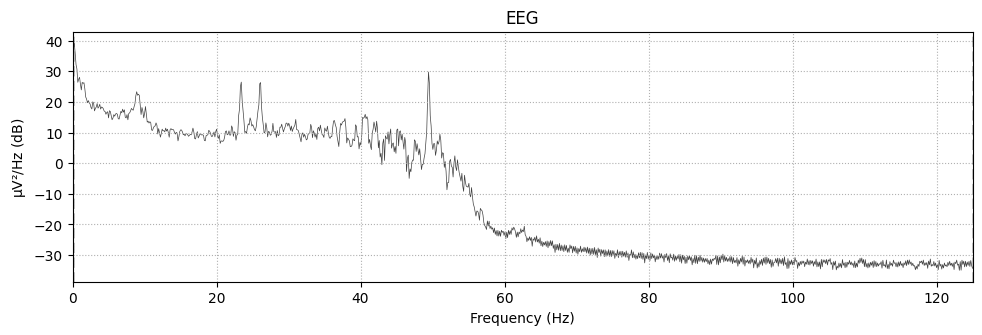

Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


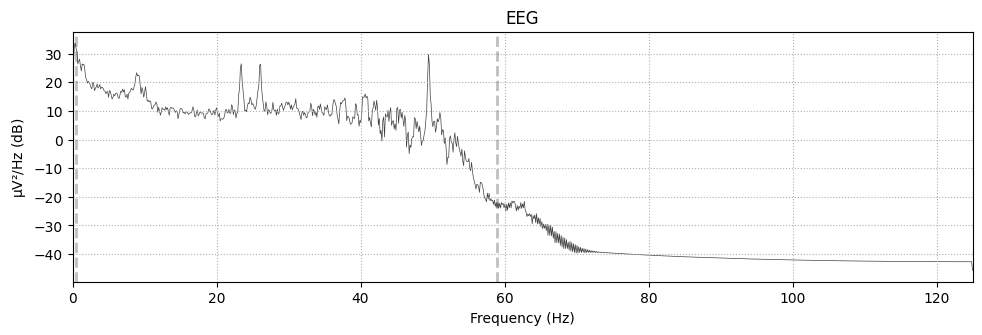

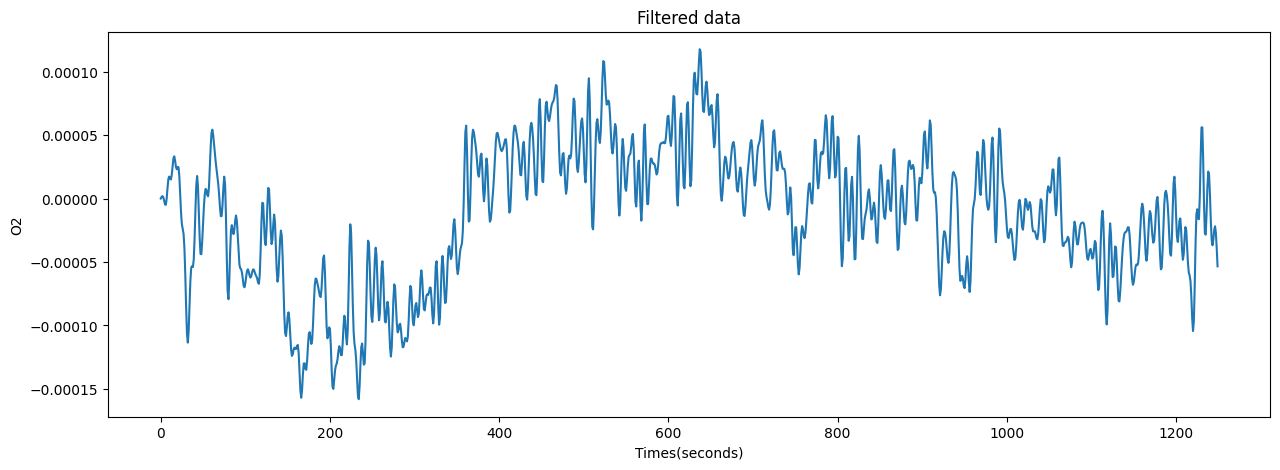

Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 50 events and 1250 original time points ...
0 bad epochs dropped


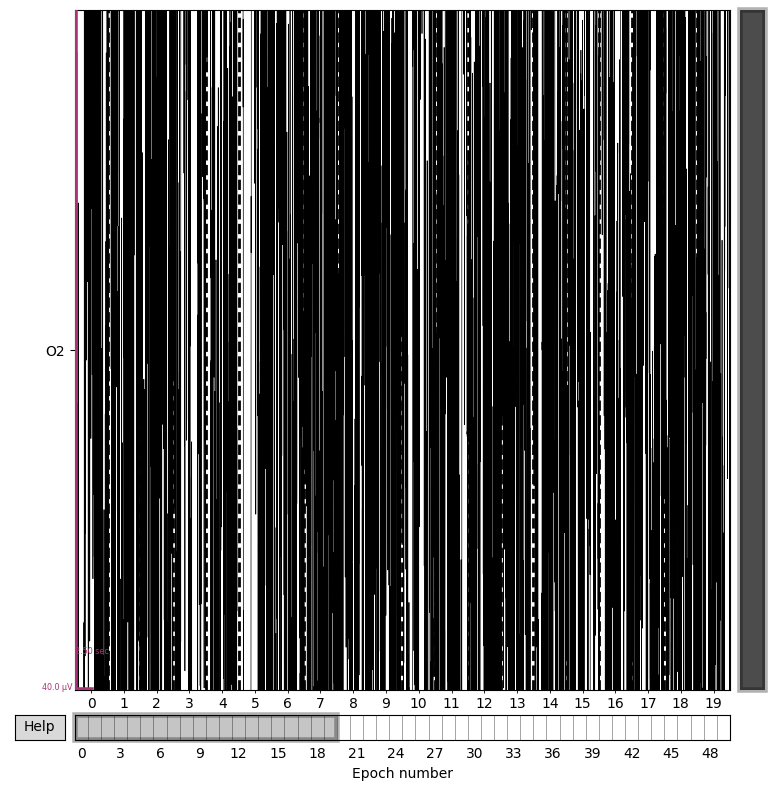

In [13]:
# Using  the definition read_data to read through the file list of the training data
data = [read_data(i) for i in file_list]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cdcd7b7a-2caf-40ce-9cca-562e2f317a32' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>